# RANDOM FOREST

# LOAD THE DEPENDANCIES

## Pandas

In [87]:
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix

## Numpy

In [88]:
import numpy as np
from numpy import set_printoptions

## Matplotlib & Seaborn

In [89]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import graphviz

## sklearn

In [90]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score

## Math & statistics

In [91]:
from scipy import stats
from scipy.stats import norm
import math

## System

In [92]:
import os
import sys
sys.path.insert(0, "C:\\Users\\Crystal\\Desktop\\Programs\\my-modules-and-libraries")
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

## notebook widgets

In [93]:
import ipywidgets as widgets
from IPython.display import Image
from IPython.display import display, Math, Latex

# FUNCTIONS

## label Encoding

In [94]:
def label_encoding(dataset,input_headers):
    
    for i in input_headers:
        
        the_data_type=dataset[i].dtype.name
        if (the_data_type=='object'):
            lable_enc=preprocessing.LabelEncoder()
            lable_enc.fit(dataset[i])
            labels=lable_enc.classes_   #this is an array
            labels=list(labels) #converting the labels array to a list
            print(labels)
            dataset[i]=lable_enc.transform(dataset[i])

            return labels
    
        else:
            c=list(np.unique(dataset[i]))
            return [str(x) for x in c]

## Feature Scaling

In [95]:
def feature_scaling(X_train,X_test):
    sc_X=StandardScaler()
    X_train=sc_X.fit_transform(X=X_train,y=None)
    X_test=sc_X.fit_transform(X=X_test,y=None)

    print(sc_X.fit(X_train))
    print(X_train[0:5])
    
    
    
    return X_train, X_test

## Visualization

In [96]:
def plot_of_data_space(dataset,data,labels,input_headers):
    
    
    xx_1=pd.DataFrame(data[:,0]) 
    xx_2=pd.DataFrame(data[:,1]) 
    y=pd.DataFrame(labels)
    
   
    plt.figure(figsize=(15,10)) 
    b=plt.scatter(xx_1[y==0],xx_2[y==0],color='b') 
    r=plt.scatter(xx_1[y==1],xx_2[y==1],color='r')
    g=plt.scatter(xx_1[y==2],xx_2[y==2],color='g') 
    bl=plt.scatter(xx_1[y==3],xx_2[y==3],color='black')
    
    
#     for i in range(0,len(xx_1)):
#         print(y[i])
#         if (y[i]==0):
#             a=plt.scatter(xx_1[i],xx_2[i],marker='o',color='blue',s=30)
#         if (y[i]==1):
#             b=plt.scatter(xx_1[i],xx_2[i],marker='o',color='red',s=30)
#         if (y[i]==2):
#             c=plt.scatter(xx_1[i],xx_2[i],marker='o',color='green',s=30)
#         if (y[i]==3):
#             d=plt.scatter(xx_1[i],xx_2[i],marker='o',color='black',s=30)
        
#     plt.xlabel(f1);plt.ylabel(f2);
#     plt.legend((a,b),tuple(np.unique(labels)))

    plt.xlabel(input_headers[0])
    plt.ylabel(input_headers[1])

    plt.grid()
    plt.legend((b,r,g,bl),tuple(np.unique(labels)))
    plt.show()


## Preprocessing: Splitting the dataset

In [97]:
def split_the_dataset(dataset,input_headers,target_header):
    
    X=dataset[input_headers]
    y=dataset[target_header]
    
    X.head()
    
    return X,y

## Replacing Zeros

In [98]:
def replacing_zeros(dataset,the_headers):
    """Function used to remove zeros from numeric features when 0 is not practical"""

    for header in the_headers:
        dataset[header]=dataset[header].replace(0,np.nan)
        mean=int(dataset[header].mean(skipna=True))
        dataset[header]=dataset[header].replace(np.nan,mean)
        
    return dataset

# MAIN PROGRAM

## Get Data

In [99]:
if __name__ == "__main__":
    
    
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/iris_/iris_data.csv'
    location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\CDH_Train.csv'
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/0529_/0529_pass_rush.csv'
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/titan/titantic_1.csv'
#     location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\diabetes.csv'
    dataset=pd.read_csv(location)
    # df=pd.read_csv('thermostat_dataset.txt',delimiter='\t')

In [100]:
    dataset.head()


,Length,Width,model_target,Species
0,4.268,1.700,1,Dog
1,3.000,1.200,1,Dog
2,2.378,0.905,1,Dog
3,7.262,2.137,0,Horse
4,6.100,2.230,0,Horse


In [101]:
    dataset.describe()

,Length,Width,model_target
count,299.000000,299.000000,299.000000
mean,4.322602,1.394833,0.234114
std,2.020140,0.654735,0.424153
min,1.051000,0.257000,0.000000
25%,2.582000,0.851500,0.000000
50%,4.207000,1.399000,0.000000
75%,6.090000,1.975000,0.000000
max,7.956000,2.494000,1.000000


In [102]:
    # header='model_target'
    # i='Length'
    # l=legend_labels=['0','1','2','3']
    # L0_data=df[(df[header]==0)]
    # L1_data=df[(df[header]==1)]
    # L2_data=df[(df[header]==2)]
    # L3_data=df[(df[header]==3)]

    # print(L1_data)

    # sns.distplot(L0_data[i],kde=True,kde_kws={"label": l[0]},color='blue')
    # sns.distplot(L1_data[i],kde=True,kde_kws={"label": l[1]},color='red')
    # sns.distplot(L2_data[i],kde=True,kde_kws={"label": l[2]},color='green')
    # sns.distplot(L3_data[i],kde=True,kde_kws={"label": l[3]},color='black')

    # plt.show()

In [103]:
# Replace zeros with the mean where needed.
rz=input('Do you need to replace any zeros in the dataset?')
if (rz.lower()=='y'):
    the_headers=['Age','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
    dataset=replacing_zeros(dataset,the_headers)
    dataset.head()

Do you need to replace any zeros in the dataset?


### Selecting inputs and targets

['Cat', 'Dog', 'Horse', 'Unknown']


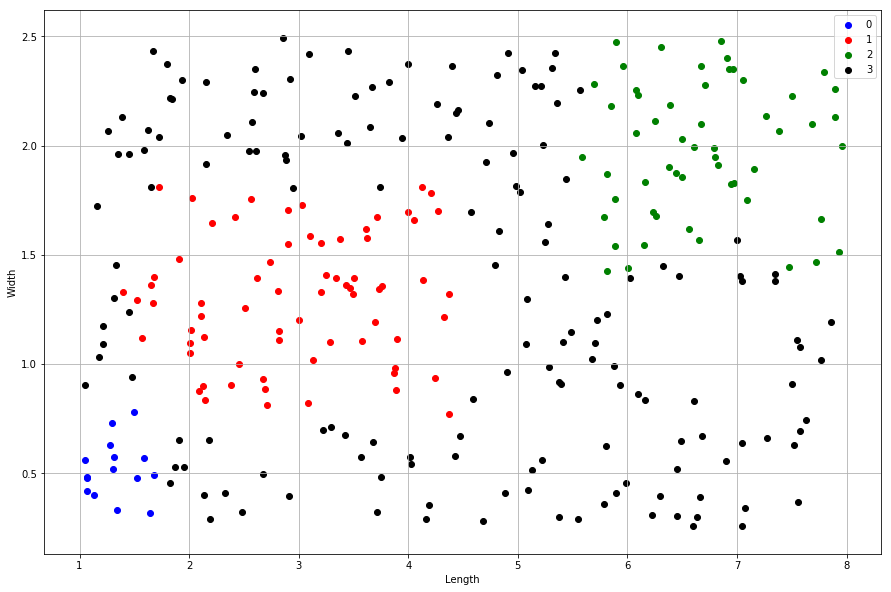

   Length  Width
0   4.268  1.700
1   3.000  1.200
2   2.378  0.905
3   7.262  2.137
4   6.100  2.230


In [104]:
target_header=['Species']
input_headers=['Length','Width']

# target_header=['Survived']
# input_headers=['Parch','Fare']

# target_header=['play_type']
# input_headers=['score_differential','yardline_100']
# input_headers=['score_differential','game_seconds_remaining','yardline_100','qtr']

# target_header=['Species']
# input_headers=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

# target_header=['Outcome']
# input_headers=['Glucose','BloodPressure']
# input_headers=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

target_label=label_encoding(dataset,target_header)

classes=target_label
test_label=label_encoding(dataset,input_headers)
#     print(test_label)


X,y=split_the_dataset(dataset,input_headers,target_header)
#     print(y.values)
if (X.values.shape[1]==2):
    plot_of_data_space(dataset,X.values,y.values,input_headers)

print(X.head())

In [105]:
    X.head()

,Length,Width
0,4.268,1.700
1,3.000,1.200
2,2.378,0.905
3,7.262,2.137
4,6.100,2.230


## Correlation Matrix

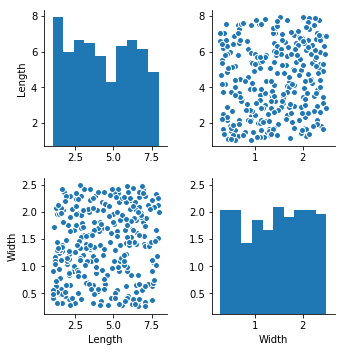

In [106]:
    sns.pairplot(X)
    plt.show()

In [107]:
y.head()

,Species
0,1
1,1
2,1
3,2
4,2


## Splitting the Train-Test data

In [108]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.20)

In [109]:
ytest.shape

(60, 1)

## Scale the data

In [112]:
#Scale the data    
Xtrain, Xtest=feature_scaling(Xtrain,Xtest)


StandardScaler(copy=True, with_mean=True, with_std=True)
[[-1.10521748 -0.31498179]
 [-0.38364875  0.04655895]
 [ 1.57897944 -1.50246913]
 [ 0.95045382  0.47768493]
 [ 0.29769822  1.60466336]]


In [113]:
ytest.head()

,Species
210,1
230,3
22,2
115,1
169,3


## Random Forest Model

In [114]:
# model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
#                                min_samples_split=2, min_samples_leaf=1, 
#                                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
#                                min_impurity_decrease=0.0, min_impurity_split=None, 
#                                bootstrap=True, oob_score=False, n_jobs=None, random_state=0, 
#                                verbose=0, warm_start=False, class_weight=None)





In [115]:
model=RandomForestClassifier(n_estimators=100, max_depth=None,
                             random_state=0)

### Fit model to training data

In [116]:
model.fit(Xtrain,ytrain)

C:\Users\Public\Programming\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Model prediction on test data

In [117]:
y_model=model.predict(Xtest)
y_model

array([1, 3, 2, 3, 3, 2, 1, 2, 3, 1, 2, 3, 2, 1, 3, 0, 3, 3, 2, 3, 1, 3,
       3, 3, 2, 3, 0, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 2, 1, 1, 1, 3, 0,
       1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3], dtype=int64)

In [119]:
y_model_prob=model.predict_proba(Xtest)
y_model_prob[0:5]

array([[0.  , 0.98, 0.  , 0.02],
       [0.  , 0.  , 0.01, 0.99],
       [0.  , 0.  , 1.  , 0.  ],
       [0.01, 0.04, 0.  , 0.95],
       [0.  , 0.  , 0.  , 1.  ]])

### Model score & performance

In [120]:
accuracy_score(ytest,y_model)

0.8666666666666667

In [121]:
recall_score(ytest, y_model,average=None)

array([1.        , 0.8       , 0.84615385, 0.90322581])

In [122]:
precision_score(ytest, y_model,average=None)

array([0.33333333, 0.92307692, 1.        , 0.84848485])

#### Confusion Matrix

In [123]:
cm=confusion_matrix(ytest, y_model)

In [124]:
cm

array([[ 1,  0,  0,  0],
       [ 0, 12,  0,  3],
       [ 0,  0, 11,  2],
       [ 2,  1,  0, 28]], dtype=int64)

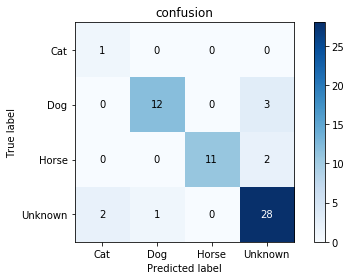

In [125]:
fig, ax = plt.subplots()
cmap=plt.cm.Blues
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title="confusion",
       ylabel='True label',
       xlabel='Predicted label')



# Loop over data dimensions and create text annotations.
normalize=False
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()



plt.show()

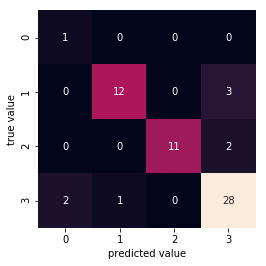

In [130]:
sns.heatmap(cm,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

#### Cross Validation

In [126]:
score=cross_val_score(model,X,y,cv=10)

C:\Users\Public\Programming\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Public\Programming\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Public\Programming\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Public\Programming\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column

In [127]:
score

array([0.90322581, 1.        , 0.93548387, 0.93548387, 0.96774194,
       0.82758621, 1.        , 0.96551724, 0.93103448, 1.        ])

In [128]:
score.mean()

0.946607341490545

C:\Users\Public\Programming\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


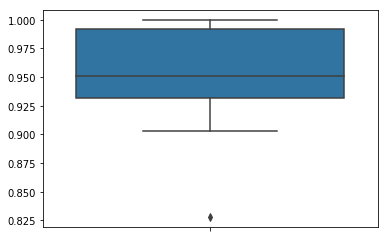

In [142]:
sns.boxplot(x=score,orient='v')
# plt.grid()
plt.show()

In [ ]:
# decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
# decision_tree = decision_tree.fit(Xtrain,ytrain)
# r = export_text(model, feature_names=input_headers)
# print(r)